In [5]:
%%bash
git clone https://github.com/ZhuoqunWang0120/cs671kaggle.git

Cloning into 'cs671kaggle'...


In [29]:
import os
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


In [7]:
os.listdir()

['.config', 'cs671kaggle', 'sample_data']

In [8]:
os.chdir('./cs671kaggle')

In [9]:
train_data = pd.read_csv('data/train.csv')
train_data = train_data.dropna()
# drop id
train_data = train_data.drop(columns = 'id')
# transform age to age groups
train_data.Age = list(map(lambda s: s[0], train_data.Age.astype('str')))
# transform dtype of temperature
train_data.Temperature = train_data.Temperature.astype('float')
# one-hot encoding
train_data = pd.get_dummies(train_data,dummy_na=False)
Xtrain, ytrain = train_data.drop(columns = 'Decision'), train_data.Decision

In [15]:
clf = RandomForestClassifier(random_state=0, max_features = 'auto')
params = {'n_estimators': np.arange(10, 200, 10)}

In [16]:
rf_cv = GridSearchCV(
    estimator = clf, 
    param_grid = params,
    scoring='accuracy',
    cv = 5, 
    verbose = True)

In [17]:
rf_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='accuracy', verbose=True)

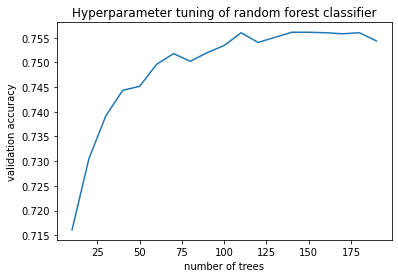

In [22]:
plt.plot(np.array(rf_cv.cv_results_['param_n_estimators'], dtype = float), rf_cv.cv_results_['mean_test_score'])
plt.title('Hyperparameter tuning of random forest classifier')
plt.xlabel('number of trees')
plt.ylabel('validation accuracy')
pass

In [23]:
%%time
rf_final = RandomForestClassifier(**rf_cv.best_params_).fit(Xtrain, ytrain)

CPU times: user 1.76 s, sys: 21.1 ms, total: 1.78 s
Wall time: 1.79 s


In [24]:
np.mean(cross_val_score(RandomForestClassifier(**rf_cv.best_params_), Xtrain, ytrain, cv = 5, scoring = 'accuracy'))

0.7515742269518736

In [25]:
import pickle
with open('rf.pkl','wb') as f1:
    pickle.dump(rf_final,f1)
with open('rf_cv.pkl','wb') as f2:
    pickle.dump(rf_cv,f2)

In [42]:
with open('../lightgbm_cv_sub9.pkl', 'rb') as f1:
    lgb_cv = pickle.load(f1)
lgb_best = lgb_cv.best_estimator_

with open('../rf.pkl', 'rb') as f1:
    rf_best = pickle.load(f1)
with open('../ridge.pkl', 'rb') as f1:
    ridge_best = pickle.load(f1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

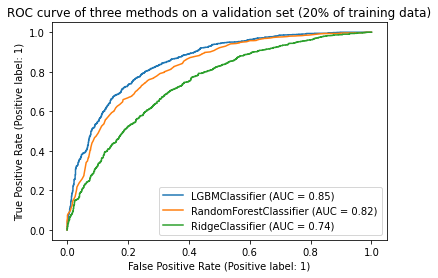

In [43]:
Xtrain1, Xval, ytrain1, yval = model_selection.train_test_split(Xtrain, ytrain, random_state = 0, test_size = 0.2)
fig = plot_roc_curve(lgb_best.fit(Xtrain1, ytrain1), Xval, yval)
fig = plot_roc_curve(rf_best.fit(Xtrain1, ytrain1), Xval, yval, ax = fig.ax_)
fig = plot_roc_curve(ridge_best.fit(Xtrain1, ytrain1), Xval, yval, ax = fig.ax_)

plt.title('ROC curve of three methods on a validation set (20% of training data)')
pass
